# <center> Movie Review Sentiment Analysis </center>
## <center> Classify the sentiment of sentences from the Rotten Tomatoes dataset </center>

##  Contents

---

* [0. Introduction](#introduction)
* [1. Exploratory data analysis](#eda)
* [2. Preprocessing the data](#preprocessing)
* [3. Deep learning algorithms](#DL)
  *  [3.1 LSTM model](#lstm)
  *  [3.2 GRU model ](#gru)
  *  [3.3 Bidirectional-GRU model](#bgru)
  *  [3.4 CNN model ](#cnn)
* [4. Machine learning models without RNN (baselines)](#ml)
  * [4.0 Example](#example)
  * [4.1 Preprocessing the data](#preprocessing_tfidf)
  * [4.2 Train classical ML algorithms on a vectorized data set](#ml_algo)

---

In today's lab, we are going to:
-  introduce the dataset (movie reviews with labels)
-  visualize the text data
-  preprocess text data
-  define and implement deep Learning models:  LSTM, GRU, Bi-directionnal RNN, CNN
-  implement baselines (classic preprocessing and ML algorithms): this part should come first but is less relevant for today !

In [3]:
# imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

print('\n\n(If this cell runs for more than 30 seconds, stop it and rerun it.) \n\n')


import requests
exec(requests.get("https://raw.githubusercontent.com/claireBoyer/tutorial-conformal-prediction/main/labs/aux-npt/get-send-code.html").content)


# Replace 'TO_UPDATE' with the appropriate session information
npt_config = {'session_name': 'Lab6-Map545',}


# Prompt for the sender's name
npt_config['sender_name'] = input("Enter your name: \n -->")
npt_config['session_owner'] = input("\n \n Your teacher: depending on your teacher, enter either \n - ataylor \n - pascalbianchi \n - constantin.philippenko \n - renaud.gaucher \n-->") #  

print('\n \n You should get as an output <Response [200]> below. If not, you probably have a typo in the teacher name, retry :)')

send('started', 0)




(If this cell runs for more than 30 seconds, stop it and rerun it.) 


Enter your name: 
 -->

 
 Your teacher: depending on your teacher, enter either 
 - ataylor 
 - pascalbianchi 
 - constantin.philippenko 
 - renaud.gaucher 
-->

 
 You should get as an output <Response [200]> below. If not, you probably have a typo in the teacher name, retry :)


<Response [400]>

<a id='introduction'></a>
## 0. Introduction 

From https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/overview/description


The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis, originally collected by Pang and Lee [1]. In their work on sentiment treebanks, Socher et al. [2] used Amazon's Mechanical Turk to create *fine-grained labels* for *all parsed phrases* in the corpus. This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: negative, somewhat negative, neutral, somewhat positive, positive. Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.


![TreeBank](https://github.com/AdrienTaylor/AdrienTaylor.github.io/blob/master/Classes/treebank.png?raw=true)



More on the sentiment treebank https://nlp.stanford.edu/sentiment/treebank.html

You can also find more technical information by looking at these papers: 
- how do you predict the label of each node given a tree ? https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf
- How do you extract a tree from a given sentence ? https://nlp.stanford.edu/~manning/papers/unlexicalized-parsing.pdf 

For now, just assume that the tree structure is given and that each node is labelled manually. 

#### **0) Looking at the example displayed in treebank.png, how is the sentence labelled? What is your own classification of this sentence based on its content?**

From subpart of the sentence and info coming from the subpart you can predict the meaning of the whole sentence. We want to predicti the sentiment of the sentence from 0 and 5


In [5]:
# Download the dataset:
# either run 
from urllib import request
remote_url = 'https://github.com/AdrienTaylor/AdrienTaylor.github.io/blob/master/Classes/train.tsv?raw=true'
local_file = 'train.tsv'
request.urlretrieve(remote_url, local_file)

# or download the file manually at https://github.com/AdrienTaylor/AdrienTaylor.github.io/blob/master/Classes/train.tsv?raw=true

('train.tsv', <http.client.HTTPMessage at 0x284951650>)

<a id='eda'></a>
## 1. Exploratory Data Analysis 

First, we are going to import the data and plot them in order to understand the specificity of the data set. The following code import the data. 

In [6]:
# If you are using Google Colab, uncomment the following
#from google.colab import files
#files.upload()
#train = pd.read_csv('train.tsv', sep = '\t') # import the train data set into the panda data frame 'train'

#If you are using jupyter notebook on your computer, uncomment the following
PATH = '.' # The following code list the files in the current directory
print("Files in current directory are", os.listdir(PATH))
train = pd.read_csv('train.tsv', sep = '\t') # import the train data set into the panda data frame 'train'

Files in current directory are ['Capture d’écran 2024-03-01 à 12.21.55.png', '.DS_Store', 'train.tsv', 'Capture d’écran 2024-03-01 à 12.24.48.png', 'Capture d’écran 2024-03-01 à 12.23.27.png', 'Lab6 RNN Sentiment A.ipynb', 'Lab3 PyTorch.ipynb', 'DL_Lecture3.pdf', 'DL_Lecture2.pdf', 'Lab_1.ipynb', 'DL_Lecture4.pdf', 'DL_Course1.pdf', '.ipynb_checkpoints', 'logisitc regression.pdf', 'Lab5_CNN.ipynb']


#### **1) Print the first 20 rows of the training data set. What is the difference between PhraseId and SentenceId?**

Pandas dataframe documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.

In [7]:

train.head(20)


#send('Your answer', 1)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


The sentiment labels are:
- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive.

#### **2) Print the full sentence for the first element in the training set. Is it a positive review in your opinion ?**

In [8]:
##
labels = ['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive']
print(" the first element in the training set is: \n '",train["Phrase"][0],"'")
print("The sentimaent label corresponding to this sentence is", labels[train['Sentiment'][0]])

send('Your answer', 2)

 the first element in the training set is: 
 ' A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . '
The sentimaent label corresponding to this sentence is somewhat negative


<Response [400]>

#### **3) Print all subphrases of the first sentence together with their labels.**

In [9]:
table = train[train["SentenceId"]==1]
rows = table.shape[0]

for i in range(rows):
    print(train["Phrase"][i], "which is classified as a ", labels[train["Sentiment"][i]], "review")


A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . which is classified as a  somewhat negative review
A series of escapades demonstrating the adage that what is good for the goose which is classified as a  neutral review
A series which is classified as a  neutral review
A which is classified as a  neutral review
series which is classified as a  neutral review
of escapades demonstrating the adage that what is good for the goose which is classified as a  neutral review
of which is classified as a  neutral review
escapades demonstrating the adage that what is good for the goose which is classified as a  neutral review
escapades which is classified as a  neutral review
demonstrating the adage that what is good for the goose which is classified as a  neutral review
demonstrating the adage which is classified as a  neutral review
demonstrating which is cla

#### **4) How many subphrases are in the data set? How many original reviews?**

In [10]:
print("The number of subphrases is equal to the number of rows in the data set, which is", train.shape[0])
print("The number of original reviews in the data set is equal to the number of Id of sentences, which is",
      train["SentenceId"].nunique())
#Beware, some SentenceId are missing. Therefore, the maximum SentenceId does not correspond to the number of Sentences
print("Maximum SentenceId", np.max(train.SentenceId))



send('There are ... subphrases and ... original reviews', 3)

The number of subphrases is equal to the number of rows in the data set, which is 156060
The number of original reviews in the data set is equal to the number of Id of sentences, which is 8529
Maximum SentenceId 8544


<Response [400]>

#### **5) How are the labels distributed in the training set? What predicting capabilities on negative and positive labels can we expect?**

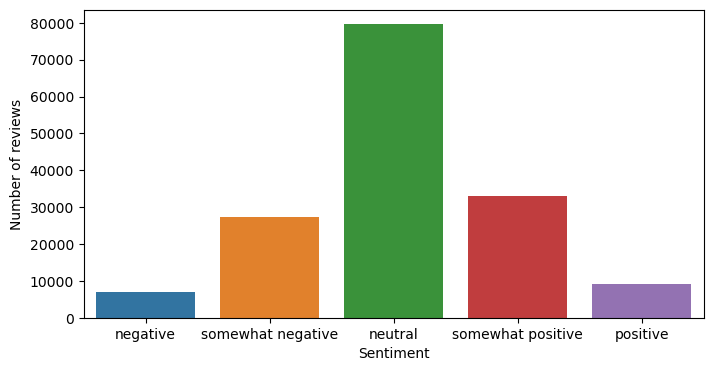

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is a DataFrame and 'Sentiment' is a column in it

class_count = train['Sentiment'].value_counts()
#value_counts() is a pandas method used to count the number of unique entries in a Series. 
#It returns a new Series where the index is the unique values from the original Series, 
#and the values are the counts of those unique values. 

x = np.array(class_count.index)
y = np.array(class_count.values)

plt.figure(figsize=((8), 4))
sns.barplot(x=x, y=y)  # Pass x and y as keyword arguments here
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')


plt.xticks(ticks=np.arange(len(x)), labels=labels)

plt.show()


The training sets is Gaussian with mean 2 (neutral sentiment is much more used)

We are going to print "word clouds". To do so, you need to install the wordcloud package at: 

https://github.com/amueller/word_cloud

You can find additional information on the package at:
 
https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html

#### **6) Use the following code to print the most frequent words of the whole training set and the most frequent words in each class/sentiment. Any comments?**

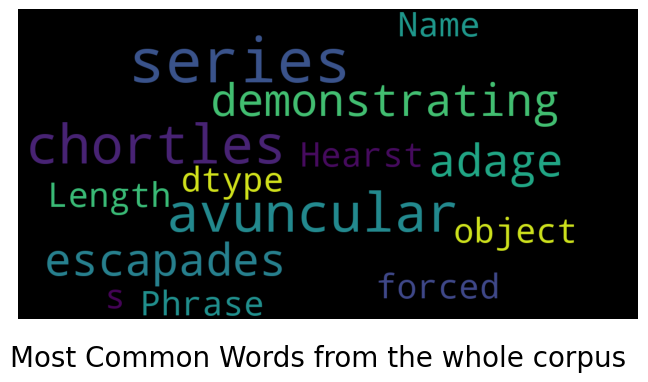

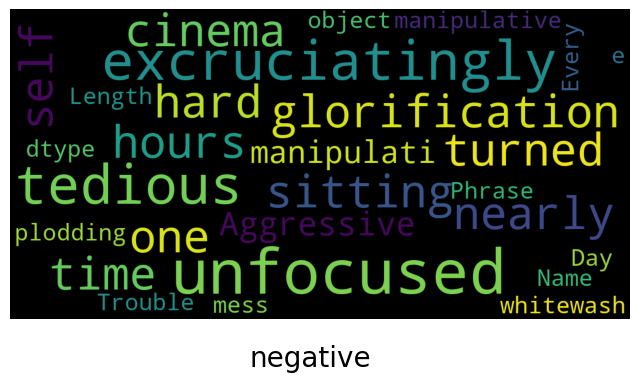

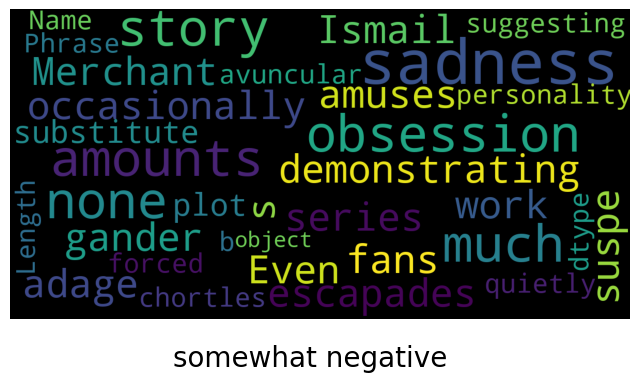

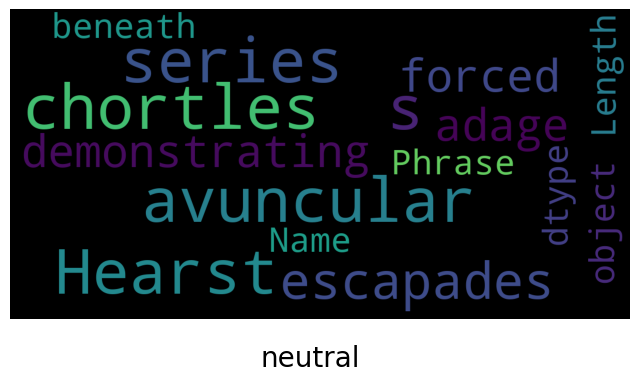

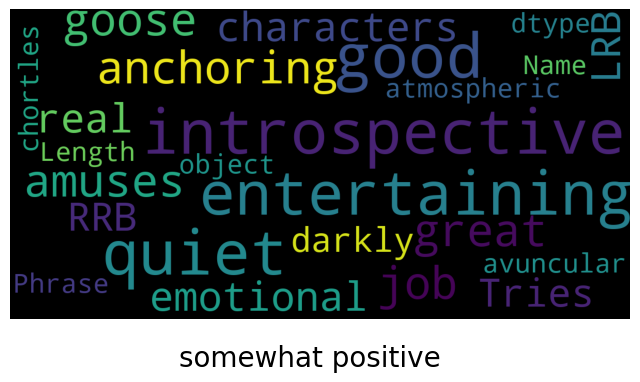

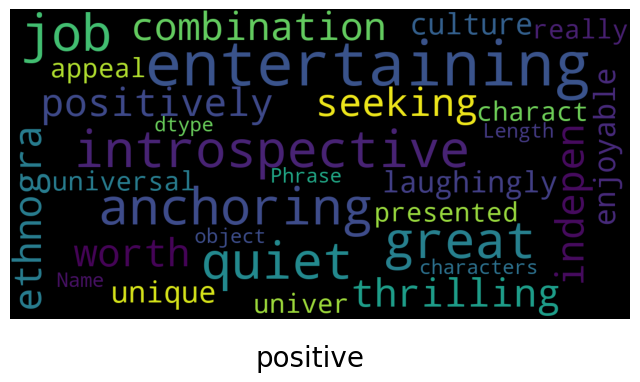

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1  # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    send(plt, 4)
    plt.imshow(wordcloud)
    plt.show()
  


show_wordcloud(train['Phrase'], 'Most Common Words from the whole corpus')
show_wordcloud(train[train.Sentiment == 0]['Phrase'], labels[0])
show_wordcloud(train[train.Sentiment == 1]['Phrase'], labels[1])
show_wordcloud(train[train.Sentiment == 2]['Phrase'], labels[2])
show_wordcloud(train[train.Sentiment == 3]['Phrase'], labels[3])
show_wordcloud(train[train.Sentiment == 4]['Phrase'], labels[4])




##  2. Preprocessing 
<a id='preprocessing'></a>


Working with NLP datasets (reviews, captions, etc.) typically involves an important preprocessing of the data. 
When working with images, the observations are naturally transformed into arrays (of size number of pixels * 3) with numerical values (in [0;255] for example). The preprocessing part is often very important for natural language datasets. As we are not dealing with quantitative variables but with words in a vocabulary, we need to be extra careful.

**You should not spend more than 20 minutes on this part.** All the details are given, and many visualizations are provided, so that you can come back afterwards to this part to understand it with more details.

We proceed with the following steps:
- 2.1 - Create a train and a validation set from the original training set.
- 2.2 - Transform the labels into categories.
- 2.3 - Transform the lists of sentences into an array:
  - Each word is mapped to a number. 
  - Lists of numbers are padded with 0 or truncated to fit in an array

###  2.1 Create a train and a validation set from the original training set.

The original test set that we imported does not contain labels. Therefore, we are going to split the training set into a training set and a validation set so that both of them contain labels. 

#### **7) To what problem do we need to pay a particular attention when we split the training set?**

The rows of the data set are not independent: they are subparts of some sentences. We thus need to put different **sentences** into the train and validation set: for a sentence, all phrases derived from this sentence will be put together. 


#### **8) Split the training set into a training set (80% of the data) and a validation set (20% of the data). You may take advantage of the functions 'isin'  and 'train_test_split' from 'sklearn.model_selection'.**

In [13]:
from sklearn.model_selection import train_test_split

# Creat the indices of the sentences for the trianing and validation set
Sent_train, Sent_val = train_test_split(train.SentenceId.unique(), test_size=0.20)

# If you want to test the code with a smaller data set, you can try instead of the previous line
X_train = train.Phrase[train.SentenceId.isin(Sent_train)]
X_val = train.Phrase[train.SentenceId.isin(Sent_val)]

Y_train = train.Sentiment[train.SentenceId.isin(Sent_train)]
Y_val = train.Sentiment[train.SentenceId.isin(Sent_val)]

 
send(np.array(X_train[1:10]), 5)

<Response [400]>

###  2.2 Transform the labels into categories.

#### **9) Transform the target into a one-hot encoded vector. You can use the function to_categorical from tensorflow.keras.utils.**

In [14]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train.values) 
Y_val = to_categorical(Y_val.values) #TODO



Y_train

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

### 2.3 Transform the lists of sentences into an array

In the following, we tokenize the train and test set.

####  **10) Understand the following cell. You can look at https://keras.io/preprocessing/text/**

In [15]:
# Warning, running this cell twice will raise error. If you want to rerun it, you need to rerun
# the two cells above before. Why?

max_features = 13000
num_classes = 5

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val   = tokenizer.texts_to_sequences(X_val)

#print('The type of Xtrain is', type(X_train))


In [16]:
 
# The function 'tokenizer' maps each word of a sentence into an integer.
#It thus turns a sentence into a sequence of integers
# See for example the correspondance for the first sentence in the data set. 

print(X_train[0])
print(train.Phrase[0])

# You can also check the correspondance to the sentence using the ```word_index``` command. 

tokenizer.word_index

# The words are sorted by number of occurences. The most frequent words are associated to the smallest integers. 


#tokenizer.word_counts


[2, 326, 3, 12628, 5104, 1, 6616, 9, 53, 8, 48, 13, 1, 4874, 8, 166, 48, 13, 1, 9627, 60, 3, 80, 808, 8857, 19, 686, 3, 80, 2030, 5, 58, 3, 2, 42]
A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


{'the': 1,
 'a': 2,
 'of': 3,
 'and': 4,
 'to': 5,
 "'s": 6,
 'in': 7,
 'is': 8,
 'that': 9,
 'it': 10,
 'as': 11,
 'with': 12,
 'for': 13,
 'its': 14,
 'an': 15,
 'film': 16,
 'movie': 17,
 'this': 18,
 'but': 19,
 'be': 20,
 'you': 21,
 'on': 22,
 'by': 23,
 "n't": 24,
 'his': 25,
 'more': 26,
 'one': 27,
 'about': 28,
 'not': 29,
 'from': 30,
 'at': 31,
 'or': 32,
 'all': 33,
 'than': 34,
 'like': 35,
 'have': 36,
 "'": 37,
 'so': 38,
 'has': 39,
 'are': 40,
 'out': 41,
 'story': 42,
 'rrb': 43,
 'up': 44,
 'who': 45,
 'most': 46,
 'lrb': 47,
 'good': 48,
 'too': 49,
 'into': 50,
 'time': 51,
 'if': 52,
 'what': 53,
 'no': 54,
 'their': 55,
 'characters': 56,
 'comedy': 57,
 'much': 58,
 'i': 59,
 'some': 60,
 'life': 61,
 'even': 62,
 'your': 63,
 'can': 64,
 'just': 65,
 'will': 66,
 'little': 67,
 "''": 68,
 'funny': 69,
 'does': 70,
 'way': 71,
 'well': 72,
 'very': 73,
 'been': 74,
 'make': 75,
 'only': 76,
 'any': 77,
 'bad': 78,
 'director': 79,
 'which': 80,
 'new': 81,
 'mo

In [17]:
# Since out of vocabulary words are removed, the length of the sentences varies. 

for i in range (10):
    print(len(X_train[i]))
    
#In order to limit the influence of the length on the predictions,
# we pad sequences. The length of the sentences, after transformation, will be 50. 

from keras.preprocessing.sequence import pad_sequences
max_words=50

X_train = pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)

35
14
2
1
1
12
1
11
1
10


In [18]:
#The same using the pad sequences

print(X_train[0])
print(train.Phrase[0])


[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     2   326     3 12628  5104     1  6616     9    53
     8    48    13     1  4874     8   166    48    13     1  9627    60
     3    80   808  8857    19   686     3    80  2030     5    58     3
     2    42]
A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


#### **11) What is the transformation operated on sentences that contain less than 50 words? You can look at https://keras.io/preprocessing/sequence/**

In [19]:
# Sentences that contain less than 50 words are padded with zeros in order to contain 50 elements/words. 
# Beware, the extra zeros are added in the first elements of the vector. 

X_train[0]

# Sentence with more than 50 words are cut at the 50th word


send('Your answer', 8)

<Response [400]>

**12) Before starting to implement an RNN, make sure you understand what type of data we are dealing with:**
- what is X_train, y_train?
- What are their respective sizes?
- Are the values floats? integers? What do they correspond to?
- Are we able to retrieve the order of the words in the original sentence?


#
#
# YOUR CODE HERE
#
#


In [20]:
send('Your answer', 9)
send('Your answer', 10)
send('Your answer', 11)
send('Your answer', 12)

<Response [400]>

---
<a id='DL'></a>
# 3. Deep learning algorithms

The goal of this part is to implement the following Recurrent Neural Networks: 
- based on LSTM
- based on GRU
- based on Bi-directional GRU
- based on CNN

For convenience, we use keras. Here is a comparison between PyTorch (that we used in the 4th lab) and keras (used in the preivous lab):

https://towardsdatascience.com/keras-vs-pytorch-for-deep-learning-a013cb63870d


<a id='lstm'></a>
## 3.1 LSTM


The first neural network we consider relies on LSTM.
See [Understanding LSTM Networks -- colah's blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) or the course for a description of LSTM.

In [21]:
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from tensorflow.keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar

#### **13) Create the 'model_LSTM' model with the following layers:**
- an Embedding layer that turns positive integers (indexes) into dense vectors of fixed size see https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
  - how many words at most can we embed (first argument)
  - we embed those words in dimension 100 (arbitrary choice, often "enough")
  - use mask_zero=True
- an LSTM layer:
  - with 64 units, 
  - dropout of 0.5, 
  - return_sequences=True
- an LSTM layer:
  - with 32 units, 
  - dropout of 0.5, 
  - return_sequences=False
- a dense Layer :
  - what should be the dimension of the output?
  - what should be the activation?

In [22]:
# Define the vocabulary size. For example, 10000 means we have 10000 unique words.

model_LSTM = Sequential([
    Embedding(input_dim=max_features, output_dim=100, mask_zero=True),
    LSTM(64, dropout=0.5, return_sequences=True),
    LSTM(32, dropout=0.5, return_sequences=False),
    # Add your Dense layer here. 5 is because we have 5 classes
    Dense(num_classes, activation='softmax')
])

model_LSTM.summary()



2024-03-01 16:30:23.139656: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-01 16:30:23.139687: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-01 16:30:23.139691: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-01 16:30:23.139732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 16:30:23.139754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1300000   
                                                                 
 lstm (LSTM)                 (None, None, 64)          42240     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 1354821 (5.17 MB)
Trainable params: 1354821 (5.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We use: 
- the categorical cross entropy for the loss
- Adam optimizer with learning rate  0.001
- accuracy for the metrics



#### **14) Compile the previous model and print the summary of the model. We can use Adam optimizer with a learning rate of 0.001.**

In [23]:
model_LSTM.compile(loss='categorical_crossentropy',
                    optimizer=Adam(lr=0.001),
                    metrics=['accuracy'])

model_LSTM.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1300000   
                                                                 
 lstm (LSTM)                 (None, None, 64)          42240     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 1354821 (5.17 MB)
Trainable params: 1354821 (5.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **15) Fit the model using nb_epochs=2 and batch_size = 128.**

In [26]:
batch_size = 128
epochs = 2

history3=model_LSTM.fit(X_train[1:1000], Y_train[1:1000], validation_data=(X_val[1:1000], Y_val[1:1000]),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)



Epoch 1/2
8/8 [==============================] - 39s 5s/step - loss: 1.0484 - accuracy: 0.6456 - val_loss: 1.1342 - val_accuracy: 0.6256
Epoch 2/2
8/8 [==============================] - 38s 5s/step - loss: 0.9819 - accuracy: 0.6627 - val_loss: 1.1112 - val_accuracy: 0.6346


#### **16) Answer the following questions**

- What is the final accuracy of the model?
- Is this reasonable? Do you think we can hope that the model accuracy can reach 100%? Why?

In [30]:
# To help picturing the quality of the predictions, here is a code for plotting a confusion matrix.
# What is a confusion matrix? https://en.wikipedia.org/wiki/Confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = ''

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

y_pred = model_LSTM.predict(X_val)
classes_x = np.argmax(y_pred, axis=1)
Y_pred = to_categorical(classes_x)


y_true = np.argmax(Y_val, axis=1)

plot_confusion_matrix(y_true, classes_x, classes, normalize=False, title=None, cmap=plt.cm.Blues)

score_LSTM = metrics.accuracy_score(Y_val, Y_pred)    # accurcy_score is compatible with onehot encoded
# != np.mean(Y_pred == Y_val)


send('Your answer', 14)
send('Your answer', 15)
send('Your answer', 16)

970/970 [==============================] - 9782s 10s/step


NameError: name 'classes' is not defined

<a id='gru'></a>
## 3.2 GRU

We now perform the same operations using a GRU unit instead of an LSTM unit. All the remaining parts of the architecture remain unchanged.

#### **17) Create a GRU architecture, compile the model and fit it to the data.**

In [ ]:

#
#
# YOUR CODE HERE
#
#



#### **18) Answer the following questions**
- What is the final accuracy of the model?
- Is there a difference between LSTM and GRU?

In [ ]:

#
#
# YOUR CODE HERE
#
#




send('Your answer', 17)
send('Your answer', 18)
send('Your answer', 19)

<a id='bgru'></a>
## 3.3 Bidirectional-GRU

We now do the same operations again using a Bidirectional GRU unit instead of the LSTM unit. All the rest of the architecture remains unchanged.

#### **19) Create a Bidirectional GRU model named 'model_BGRU', compile it and fit it to the data.**

In [ ]:

#
#
# YOUR CODE HERE
#
#


send(model_BGRU.summary(), 20)

#### **20) Comment on the performance of BGRU.**

- What is the final accuracy of the model?
- Do you expect a different behavior as compared to previous models?

In [ ]:

#
#
# YOUR CODE HERE
#
#


send('Your answer', 21)
send('Your answer', 22)
send('Your answer', 23)

<a id='cnn'></a>
## 3.4 CNN

Finally, you can also compare to the CNN model below.

#### **20) Create a (1D) CNN model, called 'model_CNN', compile it and fit it to the data.**

In [ ]:

#
#
# YOUR CODE HERE
#
#


send(model_CNN.summary(), 24)

#### **21) Comment on the performance of the CNN model.**

- What is the final accuracy of the model?
- Do you expect a different behavior as compared to previous models?

In [ ]:

#
#
# YOUR CODE HERE
#
#




send('Your answer', 25)
send('Your answer', 26)
send('Your answer', 27)

#### **22) Plot the training and validation errors through the epochs for all four algorithms.**

In [ ]:

#
#
# YOUR CODE HERE
#
#


<a id='ml'></a>
# 4. To go further: Machine Learning Models without RNN (baselines) 

We are going to use the Natural Language Toolkit NLTK package https://www.nltk.org/

``NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for 
- classification
- tokenization
- stemming
- tagging 
- parsing
- semantic reasoning
- wrappers for industrial-strength NLP libraries
- etc.

<a id='example'></a>
## 4.0 Example on a tiny corpus

A first idea to vectorize the word can be to count the number of occurrences of each word in the corpus. To understand the benefits and drawbacks of this method, let us look at a very simple/small data set. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

corpus = [
    'This is the first document.',
    'The document is the second document!!!',
    'And this is the third one on Patagonia.',
    'Is this the first doCUmENT?',
]

counter = CountVectorizer()
X_count = counter.fit_transform(corpus).todense()


print(counter.get_feature_names_out(), '\n')
print(X_count, '\n')

print(sum(X_count))

#### **23) Comment on the results.**

In [ ]:

#
#
# YOUR CODE HERE
#
#


send('Your answer', 28)

Counting the number of words is clearly not satisfying. Instead of a simple count, we use de **TFIDF** transform: it computes a kind of **relative importance of words**. You can look at:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf

The following code implement the TFIDF transformation.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out(), '\n')
print(X.todense())

#### **24) What is the format of X after the fit.transform operation? Do you prefer WordCount or TFIDF?**

In [ ]:

#
#
# YOUR CODE HERE
#
#


send('Your answer', 29)

You can do the same operation but considering bigrams instead of onegram (a single word). The following code implement TF-IDF for bigrams. 

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)

#List of all bigrams
print(vectorizer.get_feature_names_out(), '\n')
#print(X.todense().shape)

#The most frequent onegram/bigram
most_frequent_word = vectorizer.get_feature_names_out()[np.argmax(np.sum(X,0))]
print("The most important word with the TFIDF transformation is '", most_frequent_word,"'.")

<a id='preprocessing_tfidf'></a>
## 4.1 Preprocessing of the data

Now that we have compared WordCount and TF-IDF transformation, we can go back to our original data set. We first need to vectorize the training vectors:
- we start by dividing the data set into a training set and a validation set
- we fit the tokenizer on the training set and apply it on the validation set using n-grams (only  uni-grams and bi-grams, see https://en.wikipedia.org/wiki/N-gram) and TFIDF metric

#### **25) Split the data set and apply the tokenization described just above.**

In [ ]:

#
#
# YOUR CODE HERE
#
#


#### **26) How many n_grams are in the training set?**

In [ ]:

#
#
# YOUR CODE HERE
#
#


send('Your answer', 30)

<a id='ml_algo'></a>
## 4.2 Train classical ML algorithms on a vectorized data set

#### **27) Train a Logistic Regression model and a SVM on the previous (preprocessed) data.**

In [ ]:

#
#
# YOUR CODE HERE
#
#


send('The accuracy of logistic regression is ...', 31)

In [ ]:

#
#
# YOUR CODE HERE
#
#


send('The accuracy of svm is...', 32)

#### **28) What do you generally conclude about those methods?**


#
#
# YOUR CODE HERE
#
#


This notebook was partly adapted from Parth Rohilla's work, available at https://www.kaggle.com/parth05rohilla/kernels.